In [4]:
import pandas as pd
import pandasql as psql
 
# Load the CSV into a DataFrame
data = pd.read_csv('results_1upAlpha.csv')

In [11]:
#Shows all occurances of X and Y and where they are neighbors

sql_query_1 = '''
WITH TranslationalDB AS (
    SELECT * FROM data
)

SELECT DISTINCT AH, AW, BH, BW
FROM TranslationalDB
WHERE name = "A"
INTERSECT
SELECT DISTINCT AH, AW, BH, BW
FROM TranslationalDB
WHERE name = "D"
'''

result1 = psql.sqldf(sql_query_1, locals())

if not result1.empty:
    sql_query_2 = '''
    WITH TranslationalDB AS (
        SELECT * FROM data
    )

    SELECT  s1.ah, s1.aw, s1.bh, s1.bw
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = s2.pos1 AND
        s1.pos2 = (s2.pos2 - 1) AND
        s1.ah = s2.ah AND
        s1.aw = s2.aw AND
        s1.bh = s2.bh AND
        s1.bw = s2.bw
    )
    where s1.name = "A" and s2.name = "D"
    UNION
    SELECT  s1.ah, s1.aw, s1.bh, s1.bw
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = (s2.pos1 - 1) AND
        s1.pos2 = s2.pos2 AND
        s1.AH = s2.AH AND
        s1.AW = s2.AW AND
        s1.BH = s2.BH AND
        s1.BW = s2.BW
    )
    where s1.name = "A" and s2.name = "D"
    '''

    result2 = psql.sqldf(sql_query_2, locals())

In [15]:
print(result1)

     AH  AW  BH  BW
0     3   4   3   4
1     3   4   4   3
2     3   4   4   4
3     3   4   5   3
4     3   4   5   4
..   ..  ..  ..  ..
760  10  10   8  10
761  10  10   9  10
762  10  10  10   8
763  10  10  10   9
764  10  10  10  10

[765 rows x 4 columns]


In [16]:
print(result2)

Empty DataFrame
Columns: [AH, AW, BH, BW]
Index: []


In [ ]:
## edges based on sizes
sql_query_2 = '''
    WITH TranslationalDB AS (
        SELECT * FROM data
    )

    SELECT  s1.name, s2.name
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = s2.pos1 AND
        s1.pos2 = (s2.pos2 - 1) AND
        s1.ah = s2.ah AND
        s1.aw = s2.aw AND
        s1.bh = s2.bh AND
        s1.bw = s2.bw
    )
    where s1.ah = 4 and s1.aw = 4 and s1.bh = 4 and  s1.bw = 4
    UNION
    SELECT  s1.name, s2.name
    FROM TranslationalDB AS s1
    INNER JOIN TranslationalDB AS s2 ON (
        s1.pos1 = (s2.pos1 - 1) AND
        s1.pos2 = s2.pos2 AND
        s1.AH = s2.AH AND
        s1.AW = s2.AW AND
        s1.BH = s2.BH AND
        s1.BW = s2.BW
    )
    where s1.ah = 4 and s1.aw = 4 and s1.bh = 4 and  s1.bw = 4
    '''

result4 = psql.sqldf(sql_query_2, locals())

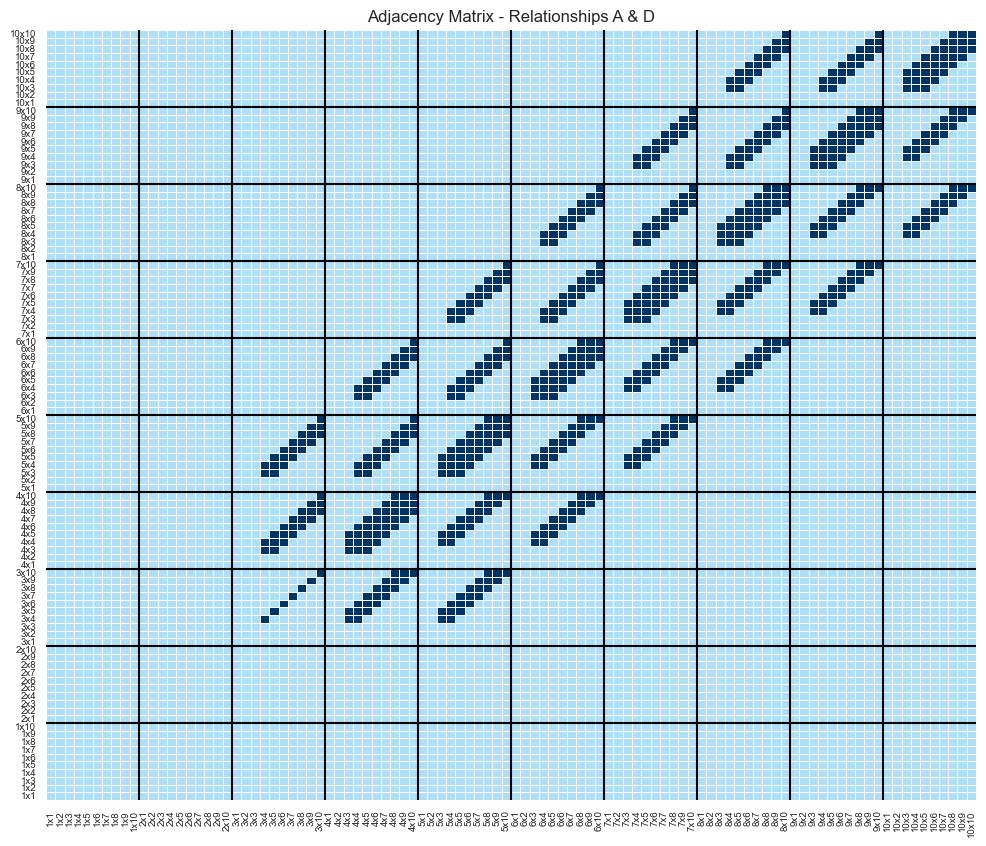

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

def generate_raster_labels():
    return [f"{i}x{j}" for i in range(1, 11) for j in range(1, 11)]

def generate_adjacency_matrix(df):
    matrix = np.zeros((100, 100), dtype=int)

    for _, row in df.iterrows():
        ah, aw = row['AH'], row['AW']
        bh, bw = row['BH'], row['BW']
        matrix[10*(ah-1) + aw-1][10*(bh-1) + bw-1] += 1

    return matrix

def combine_results(result1, result2):
    matrix1 = generate_adjacency_matrix(result1)
    matrix2 = generate_adjacency_matrix(result2)

    combined = np.where(matrix1 > 0, 1, 0)  # First set result1
    combined[matrix2 > 0] = 2  # Then overlay with result2, if any.

    return combined

def plot_combined_adjacency_matrix(matrix, labels):
    plt.figure(figsize=(12, 10))

    # Color mapping: 0 - white, 1 - blue, 2 - yellow
    color_values = ['#AEDFF7', '#003366','#FFCC00']
    cmap = ListedColormap(color_values)

    # Use the matrix values directly as the color index
    sns.heatmap(matrix, annot=False, cmap=cmap, linewidths=0.5, cbar=False, xticklabels=labels, yticklabels=labels, vmin=0, vmax=2)

    plt.title('Adjacency Matrix - Relationships A & D')
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

    for i in range(10, 100, 10):
        plt.axhline(y=i, color='black', linewidth=1.5)
        plt.axvline(x=i, color='black', linewidth=1.5)

    plt.gca().invert_yaxis()
    plt.show()




combined_matrix = combine_results(result1, result2)
plot_combined_adjacency_matrix(combined_matrix, generate_raster_labels())
